In [2]:
import os
import sys

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

# from sklearn.cluster import KMeans, spectral_clustering
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.metrics import silhouette_score, silhouette_samples
from copy import deepcopy

In [3]:
os.chdir("/home/g.esposito/sc2-benchmark")
path = os.getcwd()

log_folders = os.listdir("FSIM_W_local_obj_v2")

general_report = pd.DataFrame([])
for cnf in log_folders:
    file_path = os.path.join(path,"FSIM_W_local_obj_v2",  cnf)
    #print(file_path)
    if os.path.isdir(file_path):
        report_path = os.path.join(file_path, "Faulty_boxes_report.csv")
        report = pd.read_csv(report_path)
        report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"
        # print(report.columns)
        report['bit_faulty_position'] = np.log2(report['bitmask'])
        general_report = pd.concat([general_report, report], axis=0, ignore_index=True)
        general_report.drop(columns=['Unnamed: 0'], inplace=True)

general_report['iou_score'] = general_report['iou score']
general_report.drop(columns="iou score", inplace=True)
general_report.describe()

,imID,layer,kernel,channel,row,col,bitmask,Pred_idx,G_lab,F_count,F_lab,G_count,G_score,T_count,area_ratio,f_candidate_conf,bit_faulty_position,iou_score
count,36158.000000,36158.0,36158.000000,36158.000000,36158.000000,36158.000000,3.615800e+04,36158.000000,36158.000000,36158.000000,36158.000000,36158.000000,36158.000000,36158.000000,36158.000000,36158.000000,36158.000000,36158.000000
mean,54.787875,0.0,31.294153,1.009514,3.122407,3.096908,3.609686e+08,6.356878,26.434288,12.075640,26.214918,10.516898,86.496750,12.783893,109.664247,84.847142,25.774517,76.611135
std,29.623105,0.0,18.486955,0.795080,1.922095,1.967111,6.830419e+08,4.963915,28.156301,7.451255,27.981515,6.234897,9.189678,7.959524,275.655331,11.049857,3.051515,22.032725
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.048576e+06,0.000000,1.000000,1.000000,1.000000,1.000000,70.006996,1.000000,0.169223,60.009789,20.000000,0.000000
25%,28.000000,0.0,16.000000,0.000000,1.000000,1.000000,1.677722e+07,3.000000,1.000000,7.000000,1.000000,6.000000,78.183848,7.000000,88.461538,75.637832,24.000000,77.204068
50%,59.000000,0.0,31.000000,1.000000,3.000000,3.000000,3.355443e+07,5.000000,9.000000,11.000000,9.000000,10.000000,87.460542,11.000000,99.936845,86.520255,25.000000,84.347507
75%,79.000000,0.0,47.000000,2.000000,5.000000,5.000000,2.684355e+08,9.000000,57.000000,15.000000,56.000000,13.000000,94.887209,17.000000,112.604015,94.813150,28.000000,87.991798
max,99.000000,0.0,63.000000,2.000000,6.000000,6.000000,2.147484e+09,28.000000,86.000000,41.000000,88.000000,29.000000,99.980658,34.000000,25358.333333,99.946898,31.000000,96.954315


In [4]:
counter = 0
print(len(general_report.query("F_lab!=G_lab")))
print(len(general_report))

1666
36158


In [9]:
# general_report.query("F_lab!=G_lab").describe()
general_report.query("iou_score < 90 and F_lab==G_lab").describe()

,imID,layer,kernel,channel,row,col,bitmask,Pred_idx,G_lab,F_count,F_lab,G_count,G_score,T_count,area_ratio,f_candidate_conf,bit_faulty_position,iou_score
count,34492.000000,34492.0,34492.000000,34492.000000,34492.000000,34492.000000,3.449200e+04,34492.000000,34492.000000,34492.000000,34492.000000,34492.000000,34492.000000,34492.000000,34492.000000,34492.000000,34492.000000,34492.000000
mean,55.111098,0.0,31.355677,1.008611,3.122724,3.095558,3.601966e+08,6.292706,26.113823,12.155920,26.113823,10.533776,86.828191,12.864983,102.375851,85.616143,25.765337,79.749120
std,29.759193,0.0,18.487403,0.795752,1.923740,1.968034,6.823165e+08,4.975871,28.017789,7.535952,28.017789,6.304871,9.176608,8.025857,66.998177,10.634484,3.056657,16.253713
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.048576e+06,0.000000,1.000000,1.000000,1.000000,1.000000,70.006996,1.000000,1.049869,60.010314,20.000000,0.000000
25%,28.000000,0.0,16.000000,0.000000,1.000000,1.000000,1.677722e+07,3.000000,1.000000,7.000000,1.000000,6.000000,78.507882,7.000000,88.972763,76.911169,24.000000,78.578504
50%,64.000000,0.0,31.000000,1.000000,3.000000,3.000000,3.355443e+07,5.000000,9.000000,11.000000,9.000000,10.000000,88.489944,12.000000,100.100100,87.602842,25.000000,84.820158
75%,79.000000,0.0,47.000000,2.000000,5.000000,5.000000,2.684355e+08,9.000000,56.000000,15.000000,56.000000,13.000000,95.049417,17.000000,112.804233,95.036790,28.000000,88.041251
max,99.000000,0.0,63.000000,2.000000,6.000000,6.000000,2.147484e+09,26.000000,86.000000,41.000000,86.000000,29.000000,99.980658,34.000000,7288.888889,99.946898,31.000000,89.999377


# Iou_score critical analysis

In [11]:
print(f'percentage of critical boxes because of the low iou score: {len(general_report.query("iou_score < 90 and F_lab==G_lab"))/len(general_report)}')

percentage of critical boxes because of the low iou score: 0.953924442723602


Most of the boxes are here reported because of the iou_score which is critical and not for the different label

In [29]:
general_report['confidence_ratio'] = general_report['f_candidate_conf'] / general_report['G_score']
score_report = general_report.query("iou_score < 90 and F_lab==G_lab")
# general_report['confidence_ratio'].describe()

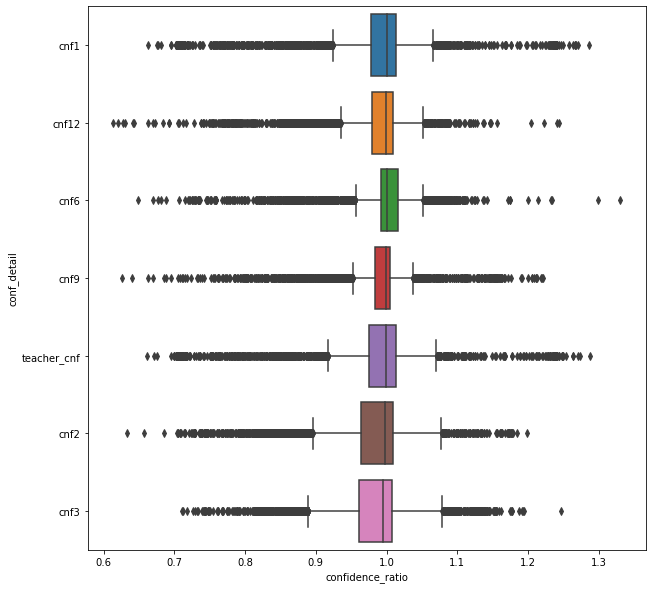

In [34]:
# score_report['confidence_ratio'] = np.log(score_report['confidence_ratio'])
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.boxplot(x='confidence_ratio', y = 'conf_detail', data = score_report)

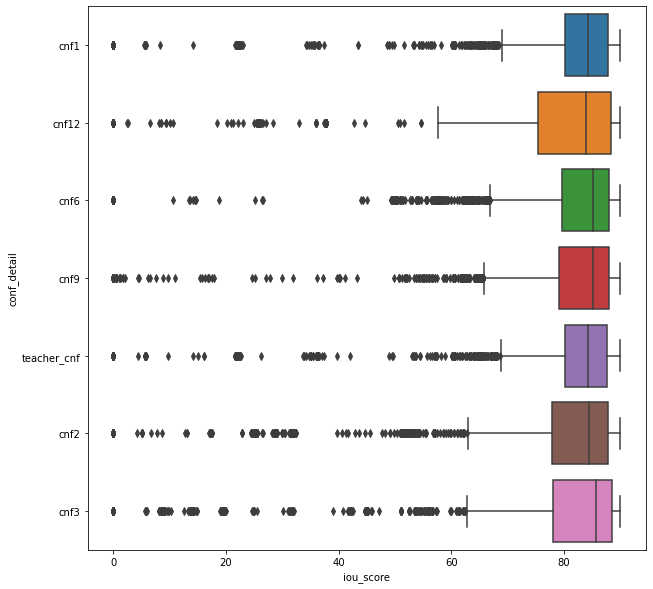

In [35]:
# score_report['confidence_ratio'] = np.log(score_report['confidence_ratio'])
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.boxplot(x='iou_score', y = 'conf_detail', data = score_report)

In [44]:
q1 = score_report.groupby("conf_detail").describe()['iou_score']['25%']
q3 = score_report.groupby("conf_detail").describe()['iou_score']['75%']
iqr = q3 - q1


conf_detail
cnf1            7.675197
cnf12          13.050867
cnf2            9.970939
cnf3           10.419968
cnf6            8.503259
cnf9            8.891634
teacher_cnf     7.585271
dtype: float64

While the confidence ratio has a variability around 1 that is low (that means that the confidence of the model in predicting something does not change too much), the iou_score is more sensible.

On the basis of the resilience (iou_score), models  can be ranked with respect to the interquantile distance:
- teacher_cnf
- cnf1
- cnf6
- cnf9
- cnf2
- cnf3
- cnf12

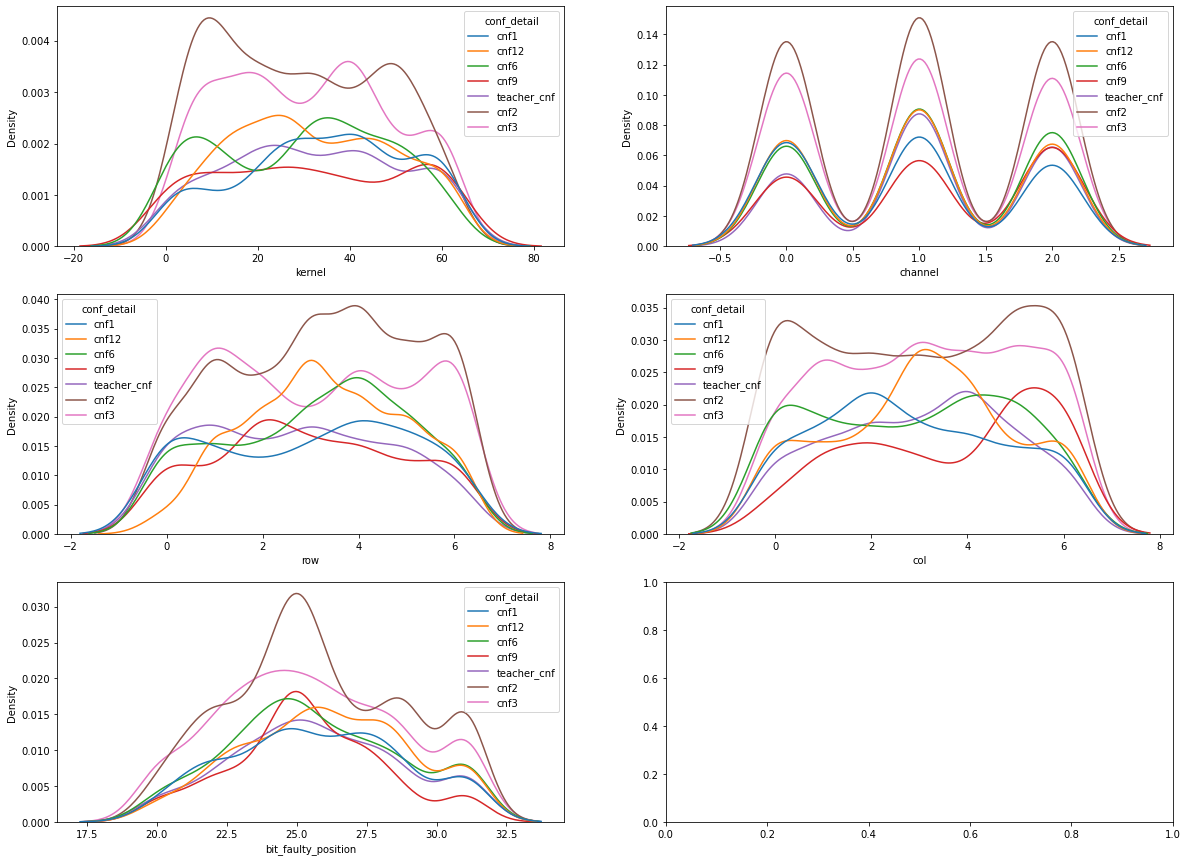

In [60]:
fig, ax = plt.subplots(3,2, figsize=(20,15))
sns.kdeplot(data = score_report[score_report['iou_score']<70], x ='kernel', hue = 'conf_detail', ax=ax[0][0])
sns.kdeplot(data = score_report[score_report['iou_score']<70], x ='channel', hue = 'conf_detail', ax=ax[0][1])
sns.kdeplot(data = score_report[score_report['iou_score']<70], x ='row', hue = 'conf_detail', ax=ax[1][0])
sns.kdeplot(data = score_report[score_report['iou_score']<70], x ='col', hue = 'conf_detail', ax=ax[1][1])
sns.kdeplot(data = score_report[score_report['iou_score']<70], x ='bit_faulty_position', hue = 'conf_detail', ax=ax[2][0])

### Is there any behaviour with respect to a specific fault as combination of: kernel, channel, row, col, bit_faulty_position

In [62]:
score_report.columns

Index(['FaultID', 'imID', 'layer', 'kernel', 'channel', 'row', 'col',
       'bitmask', 'Pred_idx', 'G_lab', 'F_count', 'F_lab', 'G_count',
       'G_score', 'T_count', 'area_ratio', 'f_candidate_conf', 'conf_detail',
       'bit_faulty_position', 'iou_score', 'confidence_ratio'],
      dtype='object')

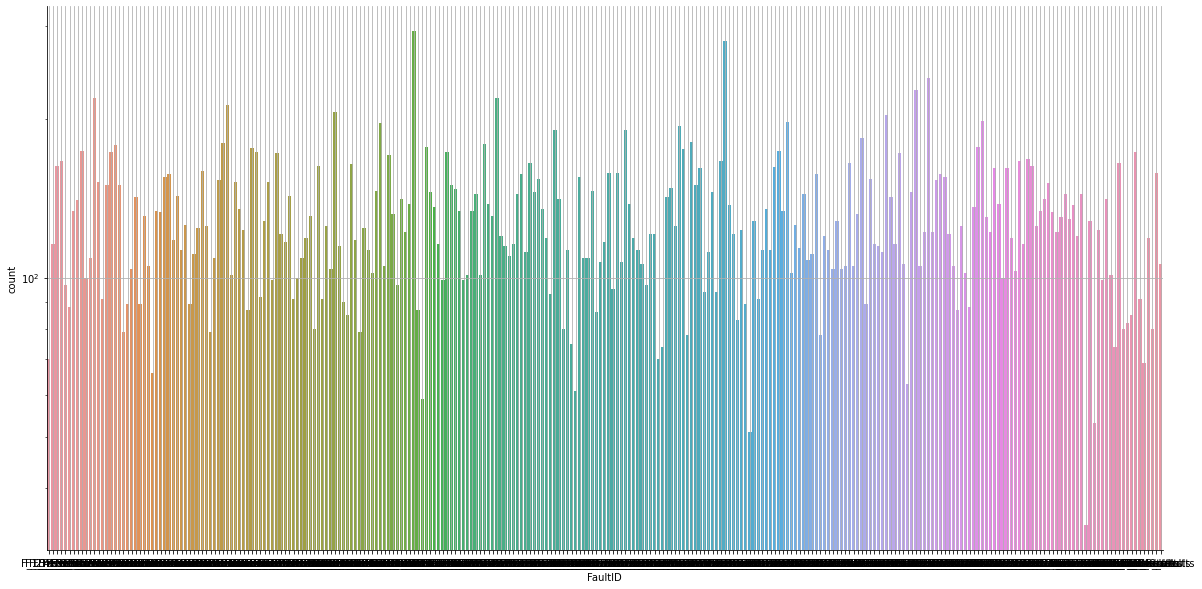

In [65]:
# to_melt = score_report[score_report['iou_score'] < 70][['conf_detail','FaultID', 'iou_score']]
# df_melted = to_melt.melt(id_vars='FaultID', var_name='fault_type', value_name='iou_score')

fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.despine(fig)
sns.countplot(x='FaultID', data=score_report, ax=ax)
ax.grid()
ax.set_yscale('log')

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(20,15))
sns.kdeplot(data = score_report[score_report['iou_score']<70], x ='kernel', hue = 'conf_detail', ax=ax[0][0])

## Area ratio

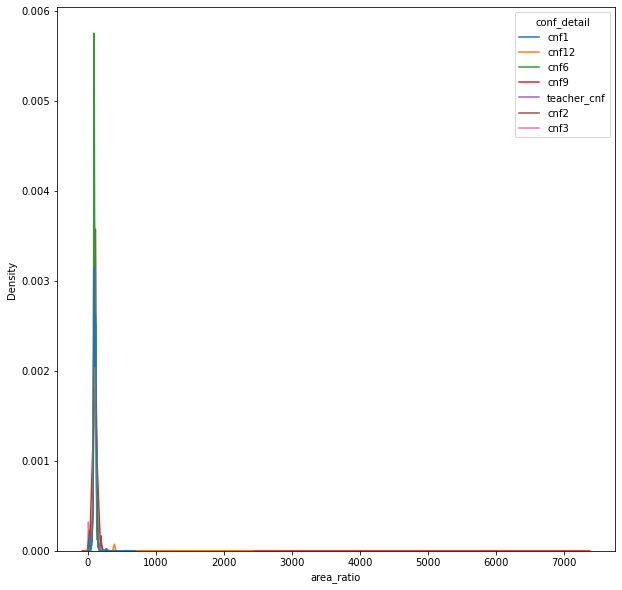

In [47]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.kdeplot(ax=ax, data=score_report, x= 'area_ratio', hue='conf_detail')

In [72]:
score_report[score_report['area_ratio']>200].groupby(by='conf_detail').groups
for key, indices in score_report[score_report['area_ratio']>200].groupby(by='conf_detail').groups.items():
    print(f'{key}: {len(indices)}')

cnf1: 17
cnf12: 77
cnf2: 30
cnf3: 17
cnf6: 2
cnf9: 16
teacher_cnf: 22


In [74]:
print(f"number of boxes whose area is the double of the fault free model: {len(score_report[score_report['area_ratio']>200])}")
print(f"which represents the {(len(score_report[score_report['area_ratio']>200]) / len(score_report))*100}% of the total critical boxes")

number of boxes whose area is the double of the fault free model: 181
which represents the 0.5247593644903166% of the total critical boxes


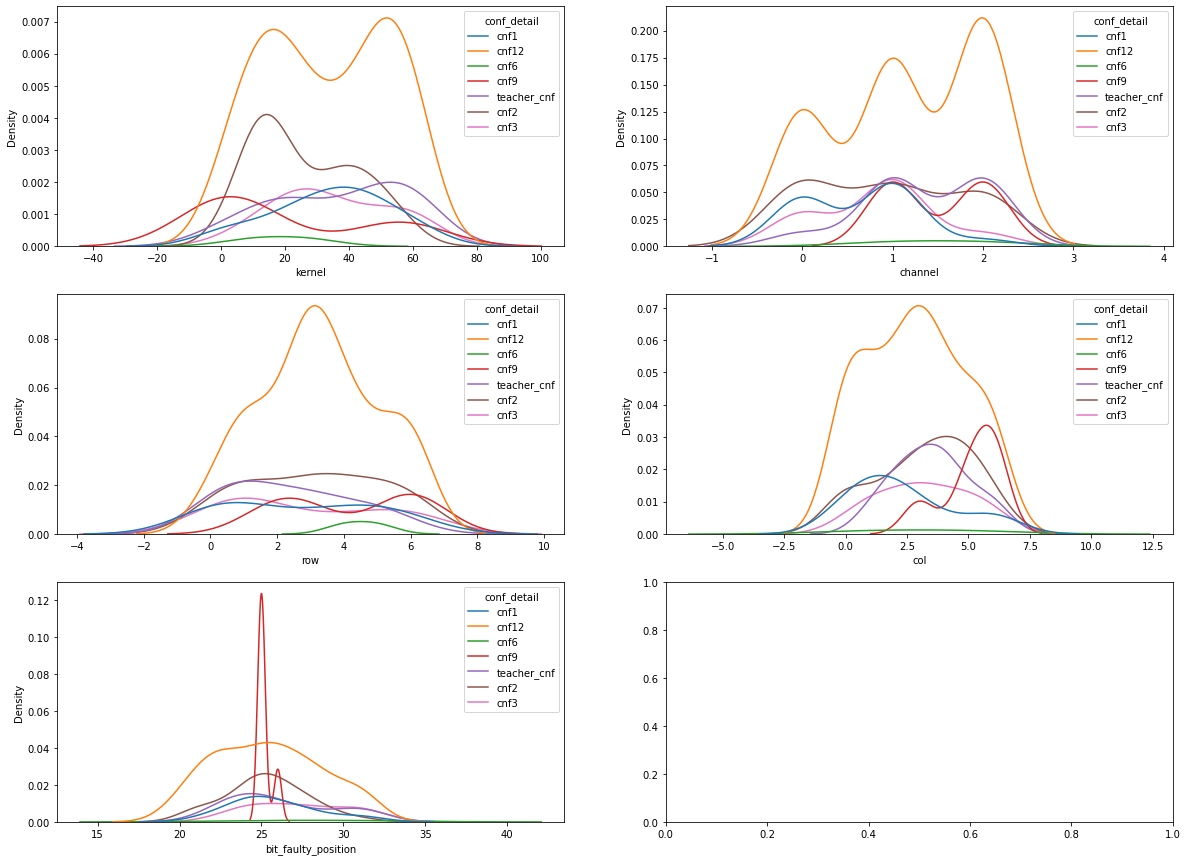

In [58]:
fig, ax = plt.subplots(3,2, figsize=(20,15))
sns.kdeplot(data = score_report[score_report['area_ratio']>200], x ='kernel', hue = 'conf_detail', ax=ax[0][0])
sns.kdeplot(data = score_report[score_report['area_ratio']>200], x ='channel', hue = 'conf_detail', ax=ax[0][1])
sns.kdeplot(data = score_report[score_report['area_ratio']>200], x ='row', hue = 'conf_detail', ax=ax[1][0])
sns.kdeplot(data = score_report[score_report['area_ratio']>200], x ='col', hue = 'conf_detail', ax=ax[1][1])
sns.kdeplot(data = score_report[score_report['area_ratio']>200], x ='bit_faulty_position', hue = 'conf_detail', ax=ax[2][0])

In these plots we can see where are the most critical points in terms of area ratio

### Cutting off these outliers let us see the distribution

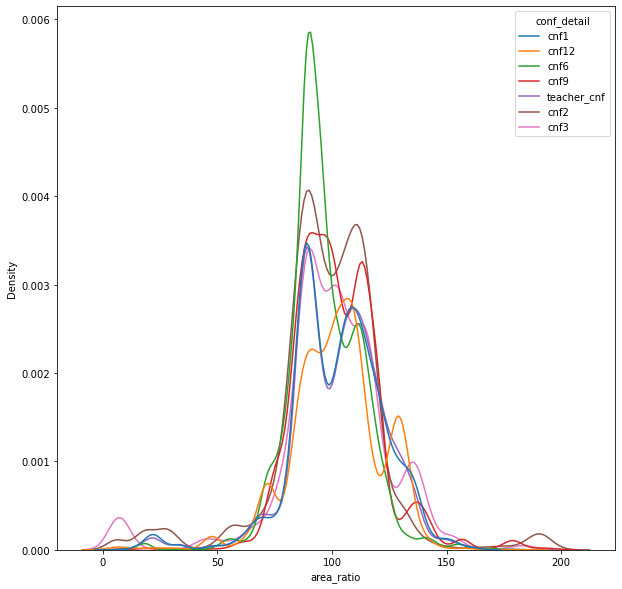

In [52]:
normal_area = score_report[score_report['area_ratio']<200]
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.kdeplot(ax=ax, data=normal_area, x= 'area_ratio', hue='conf_detail')